In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# 오버피팅 처리. IMDB 데이터

copy from https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ko


In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.2


# 데이터 준비

In [7]:
NUM_WORDS = 1000

In [11]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.imdb.load_data(num_words=NUM_WORDS)

print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [12]:
print(raw_train_x[:5])
print(raw_train_y[:5])

[list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207,

## 멀티-핫 인코딩

[1 3 5] 와 같은 데이터의 경우 1, 3, 5 인덱스만 1이고 나머지는 0으로 인코딩합니다.

```
[1 3 5] -> [0 1 0 1 0 1 0 0 0 0]   # WORD 길이가 10
```

본 예의 경우 NUM_WORDS가 1000이다.

1개의 데이터는 길이 1000의 벡터이며, 포함된 word 인덱스만 1인 값으로 인코딩 된다.

In [21]:
def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (25000, 1000) 크기의 행렬. 25000은 데이터 갯수, 1000은 NUM_WORDS
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_x = multi_hot_sequences(raw_train_x, dimension=NUM_WORDS)
test_x = multi_hot_sequences(raw_test_x, dimension=NUM_WORDS)
train_y = raw_train_y
test_y = raw_test_y

In [19]:
print(raw_train_x.shape)
print(raw_train_x[0])
print(train_x.shape)
print(train_x[0][:10])
print(train_x[0][10:20])
print(train_x[0][20:30])


(25000,)
[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
(25000, 1000)
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
[0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 0. 0. 1. 1. 0. 1. 0.]


모델이 너무 크면 패턴의 '학습'이 아닌 개별 데이터를 '기억'한다.




# 모델 크기별 과적합

### 작은 모델

In [54]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam', loss='binary_crossentropy')

smaller_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 4)                 4004      
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


### 기준 모델

In [52]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy')

baseline_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_37 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [53]:
baseline_history = baseline_model.fit(train_x,
                                      train_y,
                                      epochs=20,
                                      batch_size=512,
                                      validation_split=0.1,
                                      verbose=2)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 - 1s - loss: 0.5735 - val_loss: 0.4484
Epoch 2/20
22500/22500 - 0s - loss: 0.3774 - val_loss: 0.3533
Epoch 3/20
22500/22500 - 0s - loss: 0.3236 - val_loss: 0.3391
Epoch 4/20
22500/22500 - 0s - loss: 0.3075 - val_loss: 0.3393
Epoch 5/20
22500/22500 - 0s - loss: 0.3025 - val_loss: 0.3493
Epoch 6/20
22500/22500 - 0s - loss: 0.2974 - val_loss: 0.3388
Epoch 7/20
22500/22500 - 0s - loss: 0.2935 - val_loss: 0.3392
Epoch 8/20
22500/22500 - 0s - loss: 0.2863 - val_loss: 0.3426
Epoch 9/20
22500/22500 - 0s - loss: 0.2803 - val_loss: 0.3471
Epoch 10/20
22500/22500 - 0s - loss: 0.2759 - val_loss: 0.3461
Epoch 11/20
22500/22500 - 0s - loss: 0.2691 - val_loss: 0.3491
Epoch 12/20
22500/22500 - 0s - loss: 0.2638 - val_loss: 0.3519
Epoch 13/20
22500/22500 - 0s - loss: 0.2577 - val_loss: 0.3553
Epoch 14/20
22500/22500 - 0s - loss: 0.2530 - val_loss: 0.3609
Epoch 15/20
22500/22500 - 0s - loss: 0.2504 - val_loss: 0.3621
Epoch 16/20
225

In [55]:
smaller_history = smaller_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 - 1s - loss: 0.6719 - val_loss: 0.6356
Epoch 2/20
22500/22500 - 0s - loss: 0.5874 - val_loss: 0.5398
Epoch 3/20
22500/22500 - 0s - loss: 0.4916 - val_loss: 0.4595
Epoch 4/20
22500/22500 - 0s - loss: 0.4205 - val_loss: 0.4060
Epoch 5/20
22500/22500 - 0s - loss: 0.3760 - val_loss: 0.3755
Epoch 6/20
22500/22500 - 0s - loss: 0.3494 - val_loss: 0.3617
Epoch 7/20
22500/22500 - 0s - loss: 0.3324 - val_loss: 0.3497
Epoch 8/20
22500/22500 - 0s - loss: 0.3213 - val_loss: 0.3433
Epoch 9/20
22500/22500 - 0s - loss: 0.3139 - val_loss: 0.3404
Epoch 10/20
22500/22500 - 0s - loss: 0.3080 - val_loss: 0.3408
Epoch 11/20
22500/22500 - 0s - loss: 0.3042 - val_loss: 0.3395
Epoch 12/20
22500/22500 - 0s - loss: 0.3014 - val_loss: 0.3369
Epoch 13/20
22500/22500 - 0s - loss: 0.2989 - val_loss: 0.3389
Epoch 14/20
22500/22500 - 0s - loss: 0.2958 - val_loss: 0.3369
Epoch 15/20
22500/22500 - 0s - loss: 0.2929 - val_loss: 0.3382
Epoch 16/20
225

### 큰 모델

In [56]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam', loss='binary_crossentropy')

bigger_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_43 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


역시 같은 데이터를 사용해 모델을 훈련합니다:

In [57]:
bigger_history = bigger_model.fit(train_x,
                                  train_y,
                                  epochs=20,
                                  batch_size=512,
                                  validation_split=0.1,
                                  verbose=2)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 - 1s - loss: 0.4250 - val_loss: 0.3343
Epoch 2/20
22500/22500 - 0s - loss: 0.2881 - val_loss: 0.3406
Epoch 3/20
22500/22500 - 0s - loss: 0.2213 - val_loss: 0.3565
Epoch 4/20
22500/22500 - 0s - loss: 0.1176 - val_loss: 0.4362
Epoch 5/20
22500/22500 - 0s - loss: 0.0338 - val_loss: 0.5470
Epoch 6/20
22500/22500 - 0s - loss: 0.0068 - val_loss: 0.6401
Epoch 7/20
22500/22500 - 0s - loss: 0.0021 - val_loss: 0.6891
Epoch 8/20
22500/22500 - 0s - loss: 9.7169e-04 - val_loss: 0.7266
Epoch 9/20
22500/22500 - 0s - loss: 6.4706e-04 - val_loss: 0.7539
Epoch 10/20
22500/22500 - 0s - loss: 4.7385e-04 - val_loss: 0.7769
Epoch 11/20
22500/22500 - 0s - loss: 3.6315e-04 - val_loss: 0.7980
Epoch 12/20
22500/22500 - 0s - loss: 2.8666e-04 - val_loss: 0.8162
Epoch 13/20
22500/22500 - 0s - loss: 2.3199e-04 - val_loss: 0.8337
Epoch 14/20
22500/22500 - 0s - loss: 1.9026e-04 - val_loss: 0.8499
Epoch 15/20
22500/22500 - 0s - loss: 1.5819e-04 - 

## 로스 그래프

smaller


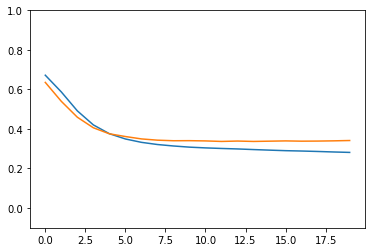

base


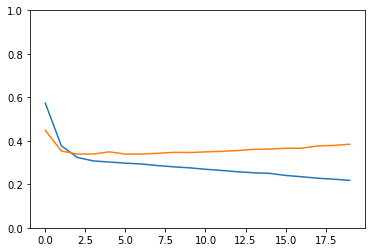

bigger


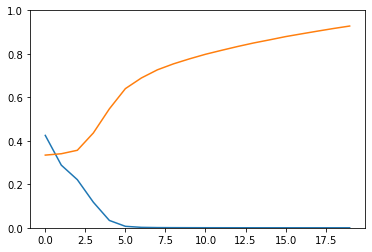

In [58]:
print("smaller")
plt.plot(smaller_history.history['loss'])
plt.plot(smaller_history.history['val_loss'])
plt.ylim((-0.1, 1.))
plt.show()

print("base")
plt.plot(baseline_history.history['loss'])
plt.plot(baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("bigger")
plt.plot(bigger_history.history['loss'])
plt.plot(bigger_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()


모델이 클수록 오버피팅 발생이 일찍 온다

# 과적합 처리

## weight Regularization

In [46]:
ㅣ2_baseline_model = keras.Sequential([
    # keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,), kernel_regularizer=keras.regularizers.l2(0.001)),
    # keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

ㅣ2_baseline_model.compile(optimizer='adam', loss='binary_crossentropy')

ㅣ2_baseline_model.summary()

l2_baseline_history = ㅣ2_baseline_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 - 1s - loss: 1.2452 - acc: 0.8079 - binary_crossentropy: 0.4208 - val_loss: 0.8992 - val_acc: 0.8604 - val_binary_crossentropy: 0.3461
Epoch 2/20
22500/22500 - 0s - loss: 0.7309 - acc: 0.8750 - binary_crossentropy: 0.3039 - val_loss: 0.6647 - val_acc: 0.8632 - val_binary_crossentropy: 0.3346
Epoch 3/20
22500/22500 - 0s - loss: 0.5549 - acc: 0.8866 - binary_crossentropy: 0.2756 - val_loss: 0.5709 - val_acc: 0.8652 - val_binary_crossentropy: 0.3342
Epoch 4/20
22500/22500 - 0s - loss: 0.4593 - acc: 0.9018 - binary_crossentropy: 0.2454 - val_loss: 0.5692 - val_acc: 0.8460 - val_binary_crossentropy: 0.3750
Epoch 5/20
22500/22500 - 0s - loss: 0.3798 - acc: 0.9278 - binary_crossentropy: 0.1945 - val_loss: 0.5316 - val_acc: 0.8604 - val_binary_crossentropy: 0.3537
Epoch 6/20
22500/22500 - 0s - loss: 0.3007 - acc: 0.9626 - binary_crossentropy: 0.1263 - val_loss: 0.5722 - val_acc: 0.8472 - val_binary_crossentropy: 0.4013
Epo

baseline


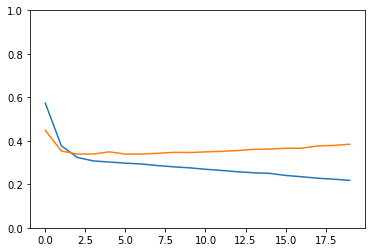

l2_baseline


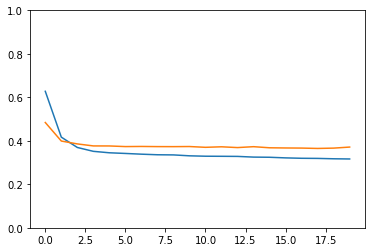

In [59]:
print("baseline")
plt.plot(baseline_history.history['loss'])
plt.plot(baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("l2_baseline")
plt.plot(l2_baseline_history.history['loss'])
plt.plot(l2_baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

발생하던 오버피팅이 완화되었다.

## Drop Out

In [60]:
dropout_baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),    # ADD
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),    # ADDD
    keras.layers.Dense(1, activation='sigmoid')
])


dropout_baseline_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

dropout_baseline_history = dropout_baseline_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 - 1s - loss: 0.6813 - acc: 0.5544 - binary_crossentropy: 0.6813 - val_loss: 0.6392 - val_acc: 0.7380 - val_binary_crossentropy: 0.6392
Epoch 2/20
22500/22500 - 0s - loss: 0.6130 - acc: 0.6472 - binary_crossentropy: 0.6130 - val_loss: 0.5216 - val_acc: 0.8112 - val_binary_crossentropy: 0.5216
Epoch 3/20
22500/22500 - 0s - loss: 0.5382 - acc: 0.7156 - binary_crossentropy: 0.5382 - val_loss: 0.4441 - val_acc: 0.8408 - val_binary_crossentropy: 0.4441
Epoch 4/20
22500/22500 - 0s - loss: 0.4906 - acc: 0.7705 - binary_crossentropy: 0.4906 - val_loss: 0.3913 - val_acc: 0.8504 - val_binary_crossentropy: 0.3913
Epoch 5/20
22500/22500 - 0s - loss: 0.4558 - acc: 0.8035 - binary_crossentropy: 0.4558 - val_loss: 0.3686 - val_acc: 0.8584 - val_binary_crossentropy: 0.3686
Epoch 6/20
22500/22500 - 0s - loss: 0.4311 - acc: 0.8199 - binary_crossentropy: 0.4311 - val_loss: 0.3558 - val_acc: 0.8588 - val_binary_crossentropy: 0.3558
Epo

baseline


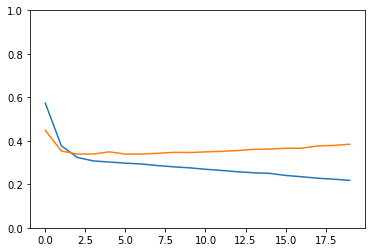

dropout_baseline


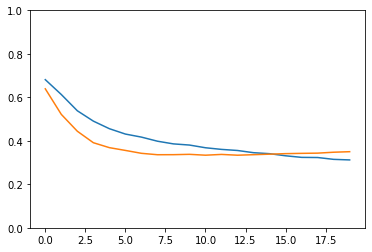

In [61]:
print("baseline")
plt.plot(baseline_history.history['loss'])
plt.plot(baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("dropout_baseline")
plt.plot(dropout_baseline_history.history['loss'])
plt.plot(dropout_baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()